# Full Experiment Aquisition

In [1]:
import ximea_cam_aquire_save as aquire
import run_experiment as runexp
import run_analysis as runana

import imp
import numpy as np
import matplotlib.pyplot as plt
import imageio
import cv2
import schedule
import time

In [2]:
#settings
subject = 'test_subject'
task = 'test_task'
exp = 'exp'
capture_dir = './capture'
analysis_dir = './analysis'
frames = 30

In [3]:
imp.reload(runexp)
imp.reload(aquire)
runexp.run_experiment(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      save_dir=capture_dir,
                      max_frames=frames)

Running an experiment.
Started eyetracking aquisition at 200fps...
Started imu aquisition at 200fps...
Starting scene aquisition at 200fps...
Saving Queue Started...
Saving Queue Started...
Saving Queue Started...
***********Finished PupilLabs Aquisition.
Finished Realsense Aquisition.
*******************Sampled to max num frames of 30
Cleanly Stopping Device Aquisition and closing file.
Writing Queue of Timestamps...
Waiting for save threads/queues to finish...
Finished Ximea Aquisition.


()

Running Frame Analysis...
[[0.00000000e+00 1.07893013e+04 1.07892814e+04 1.07892814e+04]
 [1.00000000e+00 1.07893264e+04 1.07893232e+04 1.07893232e+04]
 [2.00000000e+00 1.07893431e+04 1.07893399e+04 1.07893399e+04]
 [3.00000000e+00 1.07893598e+04 1.07893566e+04 1.07893566e+04]
 [4.00000000e+00 1.07893682e+04 1.07893733e+04 1.07893733e+04]
 [5.00000000e+00 1.07893849e+04 1.07893900e+04 1.07893900e+04]
 [6.00000000e+00 1.07893932e+04 1.07893984e+04 1.07893984e+04]
 [7.00000000e+00 1.07894099e+04 1.07894151e+04 1.07894151e+04]
 [8.00000000e+00 1.07894350e+04 1.07894318e+04 1.07894318e+04]
 [9.00000000e+00 1.07894433e+04 1.07894485e+04 1.07894485e+04]
 [1.00000000e+01 1.07894600e+04 1.07894652e+04 1.07894652e+04]
 [1.10000000e+01 1.07894851e+04 1.07894819e+04 1.07894819e+04]
 [1.20000000e+01 1.07894935e+04 1.07894902e+04 1.07894902e+04]
 [1.30000000e+01 1.07895018e+04 1.07895069e+04 1.07895069e+04]
 [1.40000000e+01 1.07895185e+04 1.07895153e+04 1.07895153e+04]
 [1.50000000e+01 1.07895269e+

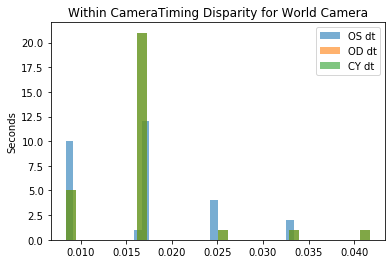

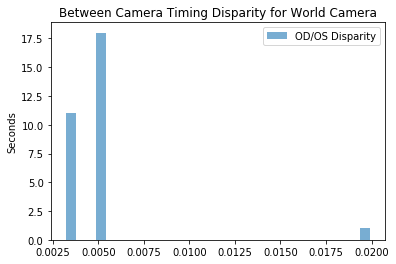

*******************************************

In [ ]:
imp.reload(runana)
runana.run_analysis(subject_name=subject, 
                      task_name=task, 
                      exp_type=exp,
                      read_dir=capture_dir,
                      save_dir=analysis_dir,
                      run_timestamp_stats=True,
                      run_convert_ims=True
                      )

In [ ]:
im = cv2.imread('./analysis/test_subject/test_task/exp/scene_camera/cam_od/frame_0.png')
plt.imshow(im)
plt.show()
plt.hist(im.flatten())